In [1]:
import pandas as pd
dataset=pd.read_csv(r'F:\SAUVGARDE 2020\user\Desktop\Gomycode\checkpoint 3\titanic-passengers.csv',sep=';')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['Survived']=encoder.fit_transform(dataset['Survived'])
dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,NaN,S


In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
#features extraction
x=dataset.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= dataset["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf= tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.7877094972067039


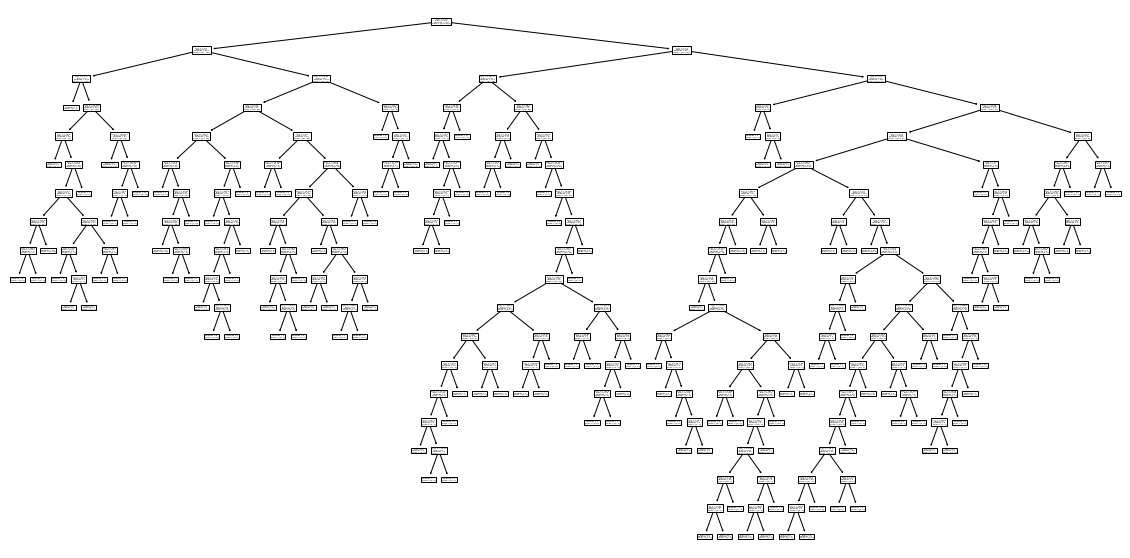

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree 
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
a = tree.plot_tree(clf)

In [20]:
x=dataset.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= dataset["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf= tree.DecisionTreeClassifier(max_depth=3)  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))



score:0.8044692737430168


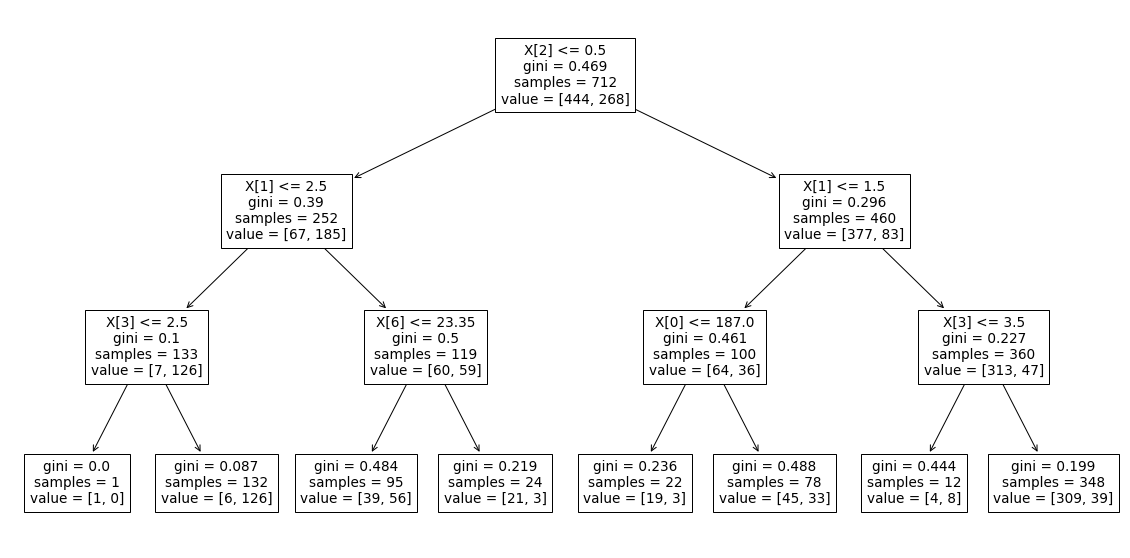

In [22]:

plt.figure(figsize=(20,10))
a = tree.plot_tree(clf)

In [27]:
#Random forest
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy


clf=RandomForestClassifier(n_estimators=40)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.88268156424581


In [30]:
clf=RandomForestClassifier(n_estimators=20)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8547486033519553


In [ ]:
#Meilleure accuracy pour la random forest et au niveau de la random forest l'accuracy varie en faisant varier le nombre d'estimateurs